<a href="https://colab.research.google.com/github/inggolanda/Gallery_Data_Analyst_Project/blob/main/TEDTalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Info

Explore the dataset 

<br>- cek kolom types
<br>- cek data duplikat
<br>- cek mising value
<br>- cek spasi di akhir atau ganda
<br>- memecah kolom "date" menjadi kolom "year" and "month"
# Exploration and Visualization
<br>- topik pertahun
<br>- Views per year
<br>- pembicara dengan topik tertinggi pertahun 
<br>- Pembicara dengan total penayangan tertinggi per tahun
<br>- Pembicara paling menarik (Mean)
<br>- Pembicara yang paling disukai (sum)
<br>- Pembicara yang paling disukai (mean)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/My Drive/Dataset/TedTalk.csv")
df.head(5)

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [3]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [4]:
data['link'].duplicated().any()

False

In [5]:
data.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [6]:
data[data.isnull().any(axis=1)]

,title,author,date,views,likes,link
3039,Year In Ideas 2015,NaN,December 2015,532,15,https://ted.com/talks/year_in_ideas_2015


In [7]:
data.loc[data['author']=='TED']

,title,author,date,views,likes,link
155,Countdown Global Livestream 2021,TED,October 2021,6100000,183000,https://ted.com/talks/ted_countdown_global_liv...
623,Countdown Global Launch 2020,TED,October 2020,113000,3300,https://ted.com/talks/ted_countdown_global_lau...


In [ ]:
data.at[3039,'author'] = 'TED'

In [8]:
for series in data:
    for value in data[series]:
        if type(value) is not str:
          break
        if value[0] == " ":
          print(value)
        if value[-1] == " ":
          print(value)
        if value.count('  ')>=1:
          print(value)

 A different understanding of American patriotism
Can you solve the human cannonball riddle? 
3 tips for leaders to get the future of work right 
What makes a friendship last? 
The rise and fall of the Lakota Empire 
The informal settlements reshaping the world 
 US politics isn't broken. It's fixed
5 steps to designing the life you want 
How to avoid catching prickly emotions from other people 
6 essential lessons for women leaders 
6 big ethical questions about the future of AI 
What Saturn's most mysterious moon could teach us about the origins of life 
How to outsmart the Prisoner's Dilemma 
A call to end the media coverage mass shooters want 
What happened when the United States tried to ban alcohol 
The economic benefits of climate action 
The legend of Annapurna, Hindu goddess of nourishment 
Epic Engineering: Building the Brooklyn Bridge 
Why "biofabrication" is the next industrial revolution  
Why "biofabrication" is the next industrial revolution  
 How to change your behavio

In [ ]:
while True:
    lock = False
    for series in data:
        for value in data[series]:
            if type(value) is not str:
                break
            if value[0] == " ":
                lock = True
                data.at[data.index[data[series] == value].tolist()[0], series] = value[1:]
                value = value[1:]
            if value.count('  ') >= 1:
                lock = True
                data.at[data.index[data[series] == value].tolist()[0], series] = value.replace("  ", " ")
                value = value.replace("  ", " ")
            if value[-1] == " ":
                lock = True
                data.at[data.index[data[series] == value].tolist()[0], series] = value[:-1]
                value = value[:-1]
    if lock == False:
        break

In [10]:
data['month']=pd.to_datetime(data['date'], format="%B %Y").dt.month_name()
data['year']=pd.to_datetime(data['date'], format="%B %Y").dt.year
data.drop('date',axis=1)

,title,author,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021
...,...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...,February,2006
5436,Do schools kill creativity?,Sir Ken Robinson,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,February,2006
5437,Greening the ghetto,Majora Carter,2900000,88000,https://ted.com/talks/majora_carter_greening_t...,February,2006
5438,Simplicity sells,David Pogue,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...,February,2006


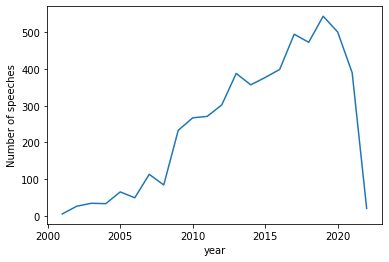

In [22]:
year_data=data.drop(data[data['year'].isin(range(1970,2000))].index.values)
year_data.groupby('year')['title'].count().plot(ylabel = 'Number of speeches')

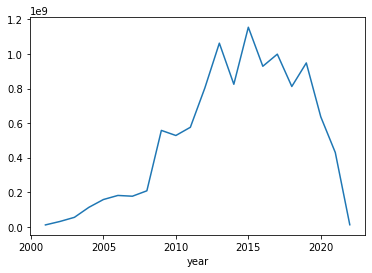

In [29]:
year_data.groupby('year')['views'].sum().plot(kind="line");

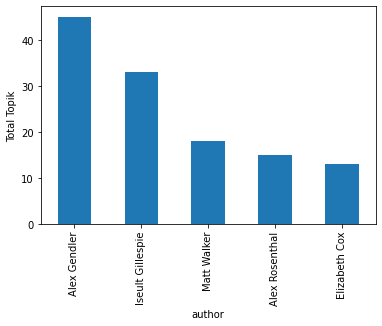

In [28]:
year_data.groupby('author')['title'].count().sort_values(ascending=False).nlargest(5).plot(kind='bar' ,ylabel='Total Topik');